In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Carregar os dados
df = pd.read_csv('diabetes_pt.csv')

# Separar features e target
X = df.drop('Resultado', axis=1)
y = df['Resultado']

# Dividir os dados em treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista para armazenar os resultados
resultados = []

In [5]:
# 1. Regressão Logística
print("\n1. Regressão Logística")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Acurácia: {lr_acc:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, lr_pred))
resultados.append(('Regressão Logística', lr_acc))


1. Regressão Logística
Acurácia: 0.7532

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [6]:
# 2. Árvore de Decisão
print("\n2. Árvore de Decisão")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Acurácia: {dt_acc:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, dt_pred))
resultados.append(('Árvore de Decisão', dt_acc))


2. Árvore de Decisão
Acurácia: 0.7468

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [7]:
# 3. Random Forest
print("\n3. Random Forest")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Acurácia: {rf_acc:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, rf_pred))
resultados.append(('Random Forest', rf_acc))



3. Random Forest
Acurácia: 0.7208

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [8]:
# 4. SVM
print("\n4. Support Vector Machine")
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"Acurácia: {svm_acc:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, svm_pred))
resultados.append(('SVM', svm_acc))


4. Support Vector Machine
Acurácia: 0.7338

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



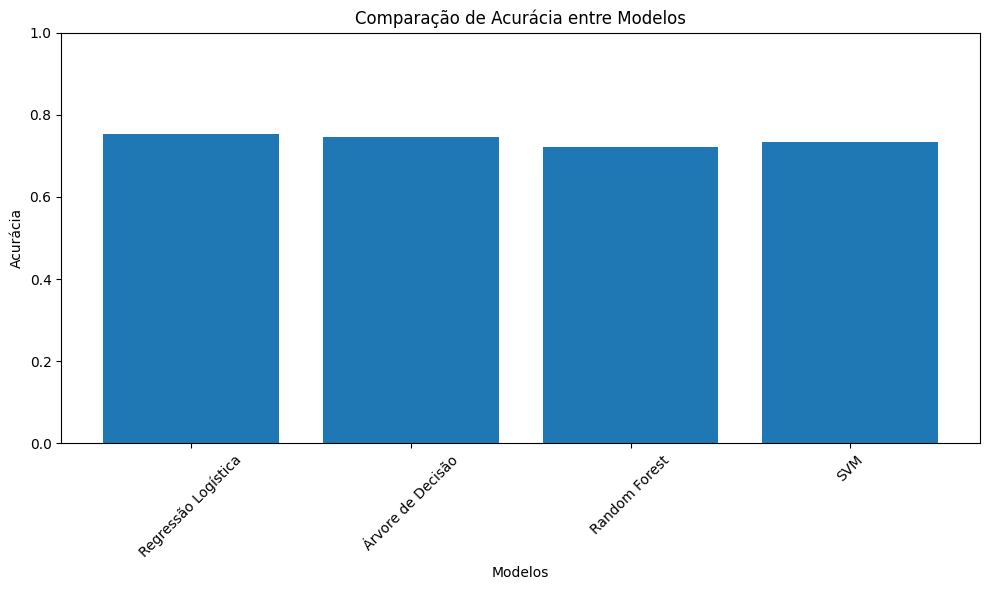

In [9]:
# Visualização dos resultados
plt.figure(figsize=(10, 6))
modelos, acuracias = zip(*resultados)
plt.bar(modelos, acuracias)
plt.title('Comparação de Acurácia entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


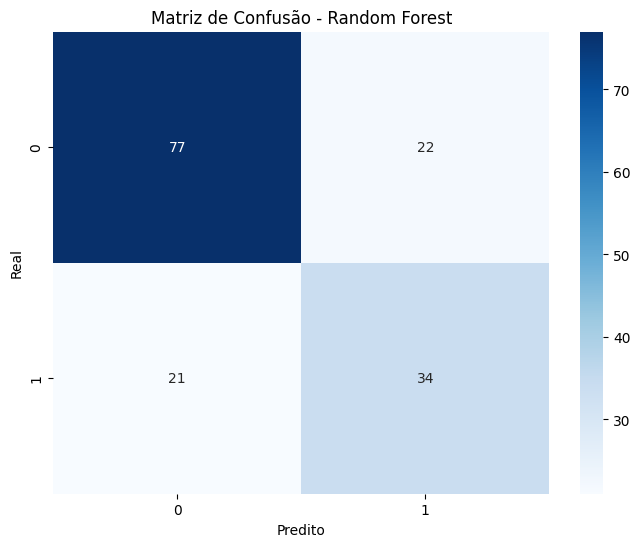

In [10]:
# Matriz de confusão para o melhor modelo (Random Forest neste caso)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

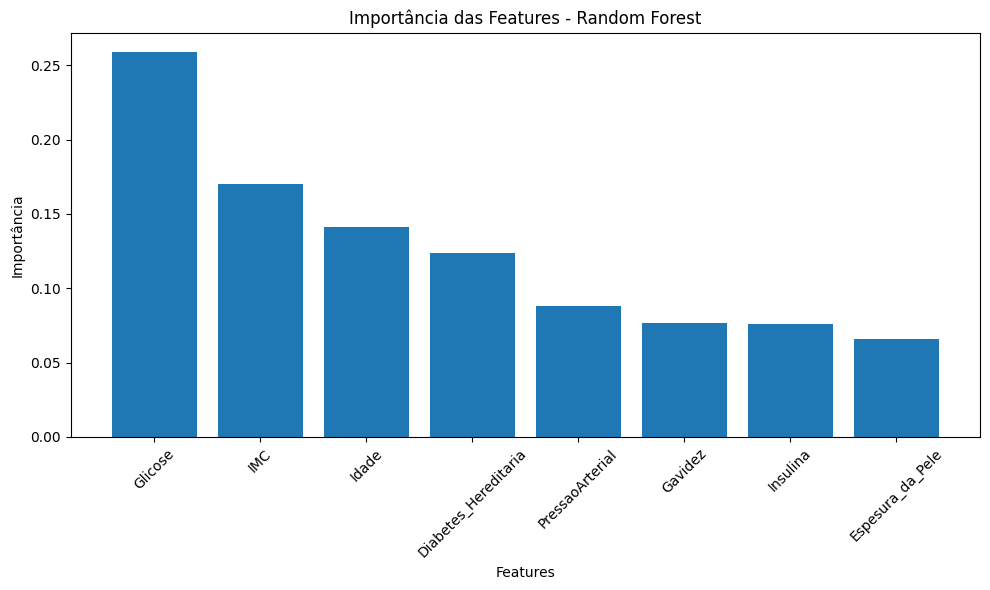

In [11]:
# Importância das features para o Random Forest
importancia_features = pd.DataFrame({
    'Feature': X.columns,
    'Importância': rf_model.feature_importances_
})
importancia_features = importancia_features.sort_values('Importância', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importancia_features['Feature'], importancia_features['Importância'])
plt.title('Importância das Features - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()